In [132]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.size'] = 16

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay


In [133]:
# load cilantro dataset
df = pd.read_csv("./data/330-students-cilantro.csv")
df.head()

,What percentage of days do you typically eat meat or fish?,What percentage grade do you expect to get in this course?,Do you like cilantro?
0,42.0,90,Yes
1,85.0,83,No
2,28.0,83,Yes
3,100.0,80,No
4,100.0,75,No


In [134]:
df.columns

Index(['What percentage of days do you typically eat meat or fish?',
       'What percentage grade do you expect to get in this course?',
       'Do you like cilantro?'],
      dtype='object')

In [135]:
# rename columns
df.columns =["meat" , "grade", "cilantro"]
df.head()

,meat,grade,cilantro
0,42.0,90,Yes
1,85.0,83,No
2,28.0,83,Yes
3,100.0,80,No
4,100.0,75,No


In [136]:
df.describe()

,meat,grade
count,200.000000,200.000000
mean,72.812850,83.440000
std,31.605226,8.633603
min,0.000000,4.000000
25%,50.000000,80.000000
50%,86.000000,85.000000
75%,100.000000,90.000000
max,100.000000,100.000000


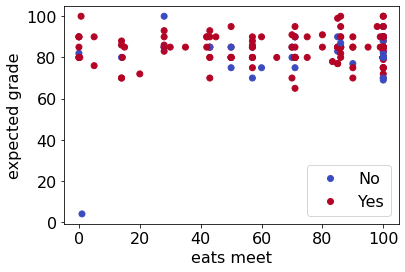

In [137]:
# visualize dataset
scatter= plt.scatter(x=df["meat"], y=df["grade"], c=df["cilantro"]=="Yes" , cmap=plt.cm.coolwarm)
plt.xlabel("eats meet")
plt.ylabel("expected grade")
plt.legend(scatter.legend_elements()[0], ["No","Yes"])
plt.show()

In [139]:
# check 
df["cilantro"].value_counts()

Yes    144
No      56
Name: cilantro, dtype: int64

In [140]:
# split features and labels
X=df[["meat","grade"]]
y=df["cilantro"]

In [141]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


### Dummy Classifier

In [142]:
# create dummy classifier
dc= DummyClassifier(strategy="prior")

In [143]:
# train dc and show the score
dc.fit(X,y)
dc.score(X,y)

0.72

- What is this doing?
- Just picking the most popular class:

In [144]:
# show how dummy classifier works
y.value_counts()/len(y)

Yes    0.72
No     0.28
Name: cilantro, dtype: float64

### Decision trees
- The decision tree algorithm automatically learns a tree, based on the data set! </br>
Let's apply a decision tree to our cilantro dataset.

In [145]:
tree1 = DecisionTreeClassifier(max_depth=1)

In [146]:
tree1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

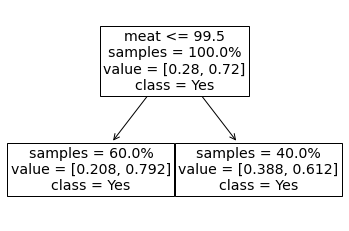

In [147]:
plot_tree(tree1, feature_names=df.columns[:-1], class_names=tree1.classes_.astype(str), impurity=False, proportion =True);

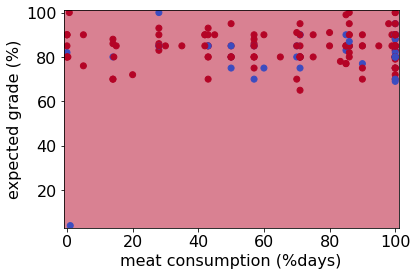

In [174]:
# plot secision surface

disp = DecisionBoundaryDisplay.from_estimator(
    tree1,
    X,
    vmin=0, vmax=1, # note to self: need to set vmin/vmax to to an issue with plot_classifier that always draws blue if all predictions are the same
    cmap=plt.cm.coolwarm, 
    response_method="predict",
    xlabel ="meat consumption (%days)",
    ylabel= "expected grade (%)",
    alpha=0.5
);
disp.ax_.scatter(x=df["meat"], y=df["grade"], c=df["cilantro"]=="Yes" , cmap=plt.cm.coolwarm);

In [149]:
tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(X, y);

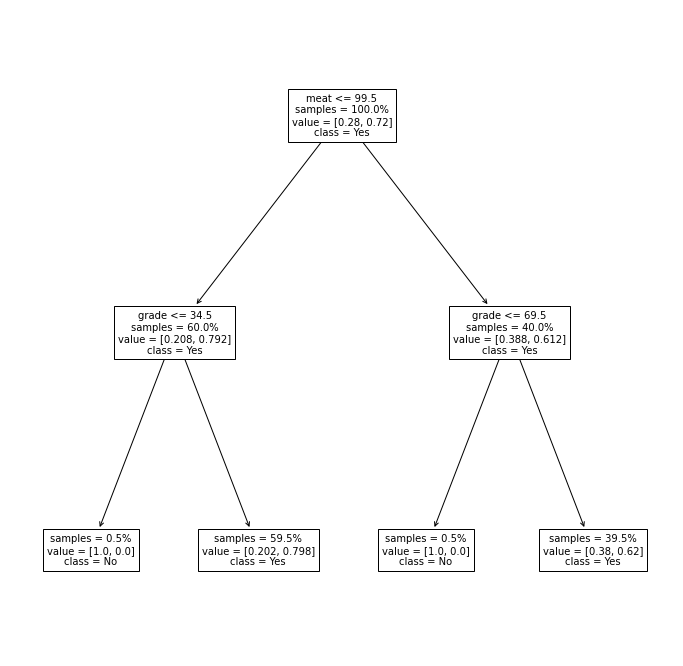

In [150]:
plt.figure(figsize=(12,12))
plot_tree(tree2 , feature_names=df.columns[:-1], class_names=tree1.classes_.astype(str), impurity=False, proportion =True , fontsize=10 );
plt.show()

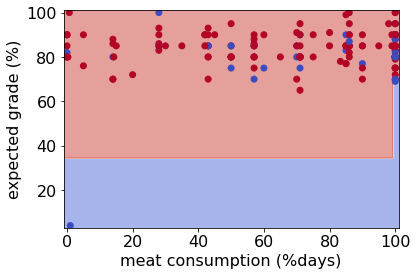

In [151]:
# plot secision surface

disp = DecisionBoundaryDisplay.from_estimator(
    tree2,
    X,
    cmap=plt.cm.coolwarm,
    response_method="predict",
    xlabel ="meat consumption (%days)",
    ylabel= "expected grade (%)",
    alpha=0.5
);
disp.ax_.scatter(x=df["meat"], y=df["grade"], c=df["cilantro"]=="Yes" , cmap=plt.cm.coolwarm);

In [152]:
tree2.score(X,y)

0.73

- By the way, what does `.score()` do?
- It calls `predict` and then compares the predictions to the true labels.

In [153]:
(tree2.predict(X) == y).sum()/len(y)

0.73

In [154]:
(tree2.predict(X)==y).mean()

0.73

increasing tree complixty </br>
Moving on to `max_depth=None`, which lets it grow the tree as much as it wants.

In [155]:
tree =DecisionTreeClassifier(max_depth=None)

In [156]:
tree.fit(X, y);

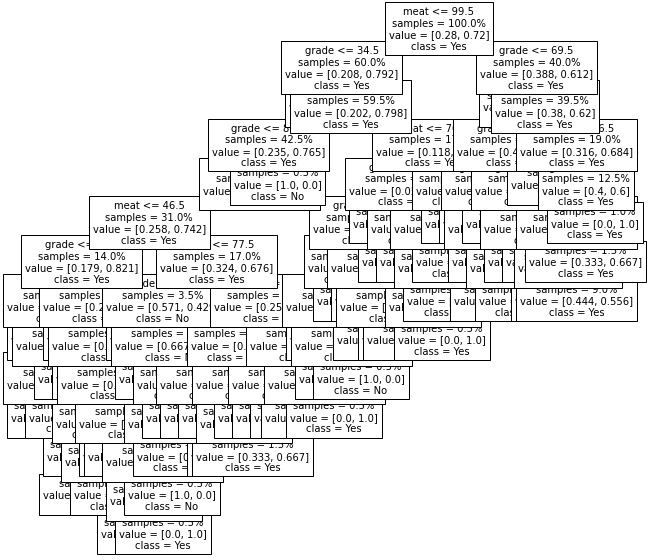

In [157]:
plt.figure(figsize=(10,10))
plot_tree(tree , feature_names=df.columns[:-1], class_names=tree1.classes_.astype(str), impurity=False, proportion =True , fontsize=10 );
plt.show()

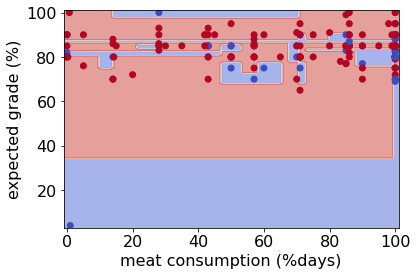

In [158]:
disp = DecisionBoundaryDisplay.from_estimator(
    tree,
    X,
    cmap=plt.cm.coolwarm,
    response_method="predict",
    xlabel ="meat consumption (%days)",
    ylabel= "expected grade (%)",
    alpha=0.5
);
disp.ax_.scatter(x=df["meat"], y=df["grade"], c=df["cilantro"]=="Yes" , cmap=plt.cm.coolwarm);

In [159]:
tree.score(X,y)

0.805

If we remove the "duplicates" (cases where X is the same, not y) then we can get 100% accuracy:

In [160]:
# are there any students with same features and different response ?!?!
df[df[["meat", "grade"]].duplicated(keep=False)].sort_values(["meat", "grade"]).head(20)

,meat,grade,cilantro
19,0.0,80,Yes
62,0.0,80,Yes
100,0.0,80,Yes
143,0.0,90,Yes
170,0.0,90,Yes
198,0.0,90,Yes
69,14.0,70,Yes
130,14.0,70,Yes
31,28.0,85,No
162,28.0,85,No


In [161]:
df_nodup= df.sort_values(by="cilantro").drop_duplicates(subset=df.columns[:-1]).reset_index(drop=True)

In [162]:
df_nodup.shape

(95, 3)

In [163]:
X_nodup =df_nodup.iloc[: ,:-1]
y_nodup =df_nodup.iloc[: , -1]

X_nodup.shape , y_nodup.shape

((95, 2), (95,))

In [164]:
tree_nodup =DecisionTreeClassifier()# default is max_depth=None
tree_nodup.fit(X_nodup,y_nodup)

DecisionTreeClassifier()

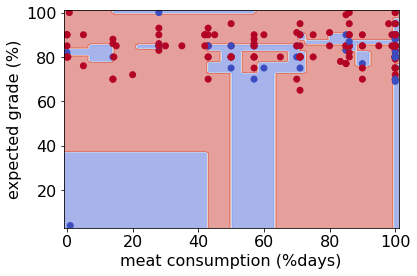

In [165]:
disp = DecisionBoundaryDisplay.from_estimator(
    tree_nodup,
    X,
    cmap=plt.cm.coolwarm,
    response_method="predict",
    xlabel ="meat consumption (%days)",
    ylabel= "expected grade (%)",
    alpha=0.5
);
disp.ax_.scatter(x=df["meat"], y=df["grade"], c=df["cilantro"]=="Yes" , cmap=plt.cm.coolwarm);

In [166]:
tree_nodup.score(X_nodup,y_nodup)

1.0

how does accuracy change vs. max_depth?

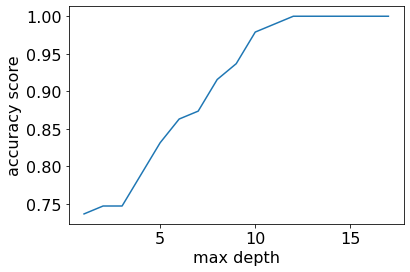

In [167]:
max_depths = np.arange(1, 18)
scores = [DecisionTreeClassifier(max_depth=max_depth).fit(X_nodup, y_nodup).score(X_nodup, y_nodup) for max_depth in max_depths]
plt.plot(max_depths, scores);
plt.xlabel("max depth");
plt.ylabel("accuracy score");

- Well, the goal of supervised learning is to predict unseen/new data...
  - The above decision tree has 100% accuracy on the training data **where we already know the answer**.
  - It perfectly labels the data we used to make the tree...
  - But we want to know how our model performs on data not used in training.
  - We will split our original dataset into two parts, one for "training" and one for "testing".

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
df_train, df_test= train_test_split(df_nodup)

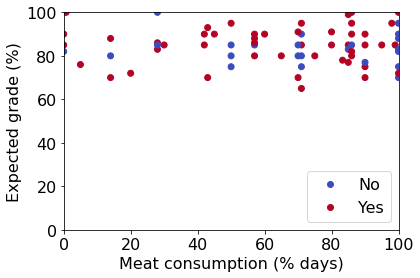

In [170]:
plt.scatter(df_train["meat"], df_train["grade"], c=df_train["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.xlim((0,100));
plt.ylim((0,100));
plt.legend(scatter.legend_elements()[0], ["No", "Yes"], loc=4);

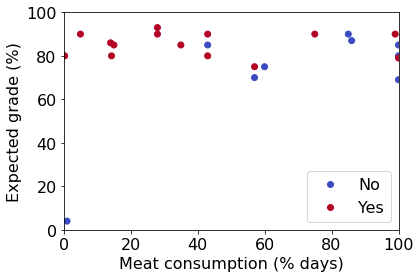

In [171]:
scatter = plt.scatter(df_test["meat"], df_test["grade"], c=df_test["cilantro"]=="Yes", cmap=plt.cm.coolwarm);
plt.xlabel("Meat consumption (% days)");
plt.ylabel("Expected grade (%)");
plt.xlim((0,100));
plt.ylim((0,100));
plt.legend(scatter.legend_elements()[0], ["No", "Yes"] , loc=4);